In [ ]:
%matplotlib inline
import statsmodels.api as sm
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

1. Importe para o R os dados do arquivo “dados_ 01.csv” e converta as variáveis acima
para séries de tempo usando o comando “ts”

In [2]:
#carrega os dados e ajusta o index para períodos mensais
data = pd.read_csv('dados_01.csv',sep=';', decimal=',', index_col=0)
data.index = pd.to_datetime(dict(year=data.index.map(int), month=((data.index*100).map(int) % 100), day=1))
data = data.to_period('M')
data.head()

,SELIC,UTCAP,INF,EXPINF
2003-01,25.0,80.4,2.25,11.72
2003-02,25.5,80.2,1.57,11.07
2003-03,26.5,79.7,1.23,9.90
2003-04,26.5,79.7,0.97,9.18
2003-05,26.5,79.9,0.61,8.23


Selecione a ordem de defasagens ótima de um modelo VAR para estas variáveis, com
base nos Critérios de Informação de Akaike, Schwarz e Hannan-Quinn, bem como no
teste de Razão de Verossimilhança (RV), considerando um máximo possível de 12
defasagens. As rotinas VARselect, do pacote vars, e VARorder, do pacote MTS,
fornecem os CIs, mas somente a segunda rotina realiza o teste de RV. [Para este
comando, supondo que a matriz de dados do VAR seja y, a sintaxe é:
VARorder(y,lag.max=12) ].

In [3]:
#cria o modelo VAR
model = sm.tsa.VAR(data)

In [4]:
model.select_order()

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        0.3740       0.4509        1.454       0.4052
1        -9.933      -9.548*    4.856e-05      -9.777*
2        -10.02       -9.331    4.439e-05       -9.742
3        -10.02       -9.016    4.476e-05       -9.610
4        -10.24       -8.931    3.589e-05       -9.708
5       -10.24*       -8.629   3.581e-05*       -9.588
6        -10.20       -8.274    3.770e-05       -9.416
7        -10.20       -7.973    3.767e-05       -9.298
8        -10.22       -7.686    3.720e-05       -9.193
9        -10.19       -7.341    3.903e-05       -9.030
10       -10.22       -7.069    3.813e-05       -8.941
11       -10.14       -6.679    4.209e-05       -8.733
12       -10.05       -6.281    4.691e-05       -8.519
13       -9.966       -5.892    5.209e-05       -8.312
14       -9.899       -5.517    5.722e-05       -8.120
* Minimum


{'aic': 5, 'bic': 1, 'fpe': 5, 'hqic': 1}

Verifique a presença de autocorrelação residual com base nos testes Portmanteau (6 e
12 defasagens) e LM de Breusch-Godfrey (até 4 defasagens).

In [237]:
#diferente do R,o pacote statsmodels não possui o teste Portmanteau multivariavel
#o codigo abaixo reporta o p-valor do teste para cada variável em separado, até 12 lags.
fit6 = model.fit(maxlags=5)
for col in fit6.resid.columns:
    print(col,sm.stats.diagnostic.acorr_ljungbox(fit6.resid[col], lags=12, boxpierce=False)[1],'\n')

SELIC [ 0.56320587  0.80680051  0.66572639  0.73851806  0.80107481  0.30428484
  0.27170086  0.35812398  0.42931385  0.51820299  0.24941299  0.27612047] 

UTCAP [ 0.8488243   0.90053504  0.93180308  0.90809154  0.81941048  0.86101208
  0.9186195   0.95380236  0.87479008  0.75917631  0.80716363  0.63251075] 

INF [ 0.86089954  0.73830308  0.8948515   0.86953052  0.86764958  0.76847227
  0.51459747  0.44979975  0.54285487  0.50139496  0.54621717  0.63080747] 

EXPINF [ 0.79188065  0.96528168  0.97748512  0.96155851  0.94961337  0.9660936
  0.98549924  0.97206745  0.96079981  0.7039296   0.51185726  0.52814901] 



Com base nos resultados anteriores, escolha o melhor modelo VAR para as variáveis analisadas.

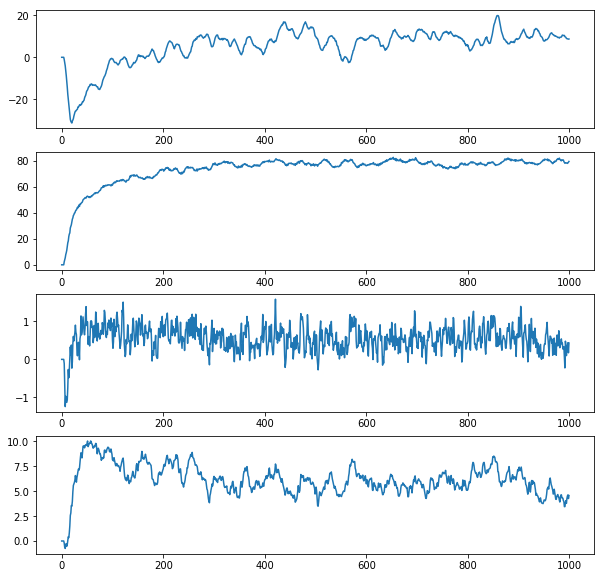

In [52]:
#escolemos o modelo com 5 defasagens
fit5 = model.fit(maxlags=5)
fit5.plotsim()

Importe para o R os dados do arquivo “dados_02.csv”. As séries estão agrupadas de 4 em 4, e cada aluno deverá analisar um grupo específico (p.ex., V1 a V4, V5 a V8 etc.), conforme definido em aula.

Deverão ser considerados os seguintes possíveis modelos: (i) ARIMA para X1 (identificado pela metodologia Box-Jenkins), (ii) VAR para X1 e X2; (iii) VAR para X1, X2, X3 e X4; (iv) ARMADL para X1 e X2. Em cada caso, o aluno deve buscar a melhor especificação possível para a amostra restrita às primeiras 200 observações.

Em seguida, o aluno deve avaliar o desempenho preditivo de cada modelo por meio do
seguinte procedimento: (i) estimar cada modelo usando apenas as primeiras 200
observações; (ii) realizar previsões a partir do modelo estimado para as próximas 20
observações, mantendo a amostra de estimação fixa em T=200; (iii) calcular o EQM de
previsão; (iv) selecionar o modelo com menor EQM. [obs. No caso do modelo
ARMADL, é necessário gerar também previsões de X2, o que pode ser feito a partir de
um modelo ARIMA]

In [202]:
#a biblioteca statsmodels espera que as series temporais sejam indexadas por datas, como os dados não possuiam data
#considerei dados diários desde jan/15
data2 = pd.read_csv('dados_02.csv',sep=';', decimal=',', index_col=0, usecols=range(4,9))
data2.index = pd.date_range(start='2015-01-01', periods=len(data2)) 
data2.head()

,V5,V6,V7,V8
2015-01-01,9.155180,10.002280,1.809067,0.951514
2015-01-02,9.127209,9.800345,1.811543,1.164562
2015-01-03,9.264625,9.907205,1.866863,1.326710
2015-01-04,9.280383,9.991321,1.974905,1.458685
2015-01-05,9.173986,9.977733,1.842954,1.431095


In [203]:
#seleciona ordens p e q para o modelo arima AR são linhas e MA são colunas
sm.tsa.arma_order_select_ic(data2['V5'].values, ic=['aic', 'bic', 'hqic'])

{'aic':             0           1           2
 0 -273.420214 -408.329651 -406.698828
 1 -344.703709 -406.699667 -404.700591
 2 -383.086187 -404.706068 -403.448436
 3 -387.579785 -405.544332 -403.632912
 4 -388.339787 -403.736966 -404.601272,
 'aic_min_order': (0, 1),
 'bic':             0           1           2
 0 -266.458936 -397.887734 -392.776272
 1 -334.261792 -392.777111 -387.297396
 2 -369.163631 -387.302874 -382.564602
 3 -370.176591 -384.660498 -379.268440
 4 -367.455954 -379.372493 -376.756161,
 'bic_min_order': (0, 1),
 'hqic':             0           1           2
 0 -270.615327 -404.122321 -401.089054
 1 -340.496379 -401.089893 -397.688374
 2 -377.476413 -397.693851 -395.033776
 3 -380.567569 -397.129672 -393.815809
 4 -379.925127 -393.919862 -393.381725,
 'hqic_min_order': (0, 1)}

In [239]:
modelo_arima = sm.tsa.ARIMA(data2.iloc[:200]['V5'],order=(0,1,1), exog=None).fit()
forecast_arima = pd.DataFrame(modelo_arima.forecast(20)[0], columns=[data2.columns[0]], index=pd.date_range(start=data2.index[200], periods=20))

In [300]:
var_12 = sm.tsa.VAR(data2.iloc[:200,[0,1]])
order = var_12.select_order()['bic']

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        -8.087       -8.052    0.0003075       -8.073
1        -8.850       -8.746    0.0001434       -8.808
2        -8.973      -8.800*    0.0001268      -8.903*
3       -8.982*       -8.739   0.0001256*       -8.884
4        -8.970       -8.658    0.0001271       -8.844
5        -8.938       -8.556    0.0001314       -8.783
6        -8.920       -8.469    0.0001337       -8.738
7        -8.947       -8.427    0.0001302       -8.736
8        -8.925       -8.336    0.0001331       -8.686
9        -8.918       -8.259    0.0001342       -8.651
10       -8.878       -8.150    0.0001397       -8.583
11       -8.853       -8.055    0.0001433       -8.530
12       -8.869       -8.001    0.0001412       -8.517
13       -8.845       -7.908    0.0001447       -8.465
14       -8.836       -7.830    0.0001461       -8.429
* Minimum


In [302]:
var_12_results = var_12.fit(order)
forecasts_var_12 = pd.DataFrame(var_12_results.forecast_interval(var_12_results.y[-order:],20)[1], columns=data2.columns[0:2], index=pd.date_range(start=data2.index[200], periods=20))

In [307]:
var_1234 = sm.tsa.VAR(data2.iloc[:200])
order = var_1234.select_order()['bic']

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        -14.70       -14.63    4.127e-07       -14.67
1        -17.18       -16.83    3.459e-08       -17.04
2        -17.46      -16.84*    2.602e-08      -17.21*
3        -17.50       -16.60    2.521e-08       -17.13
4       -17.52*       -16.34   2.460e-08*       -17.04
5        -17.43       -15.97    2.706e-08       -16.84
6        -17.45       -15.71    2.665e-08       -16.74
7        -17.40       -15.39    2.794e-08       -16.59
8        -17.36       -15.08    2.918e-08       -16.44
9        -17.30       -14.74    3.118e-08       -16.26
10       -17.21       -14.37    3.456e-08       -16.06
11       -17.16       -14.04    3.652e-08       -15.90
12       -17.10       -13.70    3.936e-08       -15.72
13       -17.04       -13.37    4.230e-08       -15.55
14       -17.03       -13.07    4.374e-08       -15.42
* Minimum


In [308]:
var_1234_results = var_1234.fit(order)
forecast_var_1234 = pd.DataFrame(var_1234_results.forecast_interval(var_1234_results.y[-order:],20)[1], columns=data2.columns, index=pd.date_range(start=data2.index[200], periods=20))

In [309]:
modelo_armadl = sm.tsa.ARMA(data2.iloc[:200]['V5'],order=(0,1), exog=data2.iloc[:200]['V6']).fit()

In [310]:
min_order = sm.tsa.arma_order_select_ic(data2.iloc[:200]['V6'].values, ic='bic')['bic_min_order']
exog_model = sm.tsa.ARMA(data2.iloc[:200]['V6'],order=min_order, exog=None).fit()
forecast_exog = pd.DataFrame(exog_model.forecast(20)[0], columns=[data2.columns[0]], index=pd.date_range(start=data2.index[200], periods=20))

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [311]:
#usando os valores reais de V6 como variável exógena para a previsão
forecast_armadl = pd.DataFrame(modelo_armadl.forecast(20, exog=forecast_exog)[0], columns=[data2.columns[0]], index=pd.date_range(start=data2.index[200], periods=20))

In [312]:
forecasts = pd.concat([data2.iloc[200:220],forecast_arima, forecast_armadl, forecasts_var_12, forecast_var_1234], axis=1, keys=['REAL','ARIMA','ARMADL','VAR_X12','VAR_X1234'])

In [313]:
forecasts.swaplevel(axis=1).sort_index(axis=1).head()

V5                                                 V6  \
               ARIMA    ARMADL      REAL   VAR_X12 VAR_X1234       REAL   
2015-07-20  9.179161  9.165739  9.259743  8.993349  8.980965  10.100974   
2015-07-21  9.179175  9.186980  9.202838  8.941714  8.919971  10.049207   
2015-07-22  9.179189  9.193709  9.189545  8.908972  8.886397  10.140497   
2015-07-23  9.179202  9.186486  9.188107  8.884840  8.869176  10.032196   
2015-07-24  9.179216  9.179308  9.135635  8.879807  8.872559   9.971916   

                                      V7                  V8            
             VAR_X12 VAR_X1234      REAL VAR_X1234      REAL VAR_X1234  
2015-07-20  9.577619  9.570136  1.925047  1.727287  1.458293  1.189282  
2015-07-21  9.556153  9.531031  2.027863  1.496495  1.427927  1.001362  
2015-07-22  9.540754  9.520441  2.188135  1.379248  1.571935  0.899280  
2015-07-23  9.527352  9.520921  2.234134  1.340917  1.607120  0.854579  
2015-07-24  9.528445  9.533969  2.195903  1.341830  1.513645  0.842038

In [314]:
mqe_arima = ((forecasts['REAL'] - forecasts['ARIMA'])**2)
mqe_armadl = ((forecasts['REAL'] - forecasts['ARMADL'])**2)
mqe_varx12 = ((forecasts['REAL'] - forecasts['VAR_X12'])**2)
mqe_varx1234 = ((forecasts['REAL'] - forecasts['VAR_X1234'])**2)
mqe = pd.concat([mqe_arima, mqe_armadl, mqe_varx12, mqe_varx1234], axis=1, names=['Modelo', 'Parâmetro'], keys=['ARIMA','ARMADL','VAR_X12','VAR_X1234']).dropna(axis=1).sum()
mqe.to_frame(name='Erro Quadrático Médio').style

In [379]:
sim_data = data2.iloc[:200].copy()

arima_data = sim_data['V5'].copy()
for i in range(20):
    modelo_arima = sm.tsa.ARIMA(arima_data,order=(0,1,1), exog=None).fit()
    forecast_arima = pd.Series(modelo_arima.forecast(1)[0], index=[arima_data.index[-1] + pd.Timedelta(days=1)], name='V5')
    arima_data = arima_data.append(forecast_arima)

In [368]:
arima_data = sim_data['V5'].copy()
modelo_arima = sm.tsa.ARIMA(arima_data,order=(0,1,1), exog=None).fit()

In [380]:
arima_data

2015-01-01    9.155180
2015-01-02    9.127209
2015-01-03    9.264625
2015-01-04    9.280383
2015-01-05    9.173986
2015-01-06    9.126748
2015-01-07    8.975371
2015-01-08    8.991859
2015-01-09    9.216138
2015-01-10    9.197883
2015-01-11    8.990885
2015-01-12    8.920708
2015-01-13    9.163511
2015-01-14    9.188468
2015-01-15    9.195445
2015-01-16    9.089904
2015-01-17    9.076569
2015-01-18    9.108703
2015-01-19    8.956676
2015-01-20    8.976364
2015-01-21    9.052088
2015-01-22    9.094461
2015-01-23    9.339275
2015-01-24    9.354720
2015-01-25    9.221859
2015-01-26    9.271109
2015-01-27    9.226518
2015-01-28    9.130925
2015-01-29    9.365423
2015-01-30    9.368671
                ...   
2015-07-10    9.246549
2015-07-11    9.246838
2015-07-12    9.296995
2015-07-13    9.336969
2015-07-14    9.223158
2015-07-15    9.383919
2015-07-16    9.292628
2015-07-17    9.033404
2015-07-18    8.964184
2015-07-19    9.127055
2015-07-20    9.179161
2015-07-21    9.179173
2015-07-22 

In [378]:
arima_data.index[-1]

Timestamp('2015-07-20 00:00:00')

In [321]:
    var_12 = sm.tsa.VAR(sim_data.iloc[:,[0,1]])
    order = 2
    var_12_results = var_12.fit(order)
    forecasts_var_12 = pd.DataFrame(var_12_results.forecast_interval(var_12_results.y[-order:],1)[1], columns=sim_data.columns[0:2], index=pd.date_range(start=sim_data.index[-1], periods=1))

    var_1234 = sm.tsa.VAR(data2.iloc[:200])
    order = 2
    var_1234_results = var_1234.fit(order)
    forecast_var_1234 = pd.DataFrame(var_1234_results.forecast_interval(var_1234_results.y[-order:],1)[1], columns=data2.columns, index=pd.date_range(start=data2.index[200], periods=20))

    modelo_armadl = sm.tsa.ARMA(data2.iloc[:200]['V5'],order=(0,1), exog=data2.iloc[:200]['V6']).fit()
    min_order = sm.tsa.arma_order_select_ic(data2.iloc[:200]['V6'].values, ic='bic')['bic_min_order']
    exog_model = sm.tsa.ARMA(data2.iloc[:200]['V6'],order=min_order, exog=None).fit()
    forecast_exog = pd.DataFrame(exog_model.forecast(1)[0], columns=[data2.columns[0]], index=pd.date_range(start=data2.index[200], periods=1))
    forecast_armadl = pd.DataFrame(modelo_armadl.forecast(1, exog=forecast_exog)[0], columns=[data2.columns[0]], index=pd.date_range(start=data2.index[200], periods=1))
    #forecasts = pd.concat([data2.iloc[200:220],forecast_arima, forecast_armadl, forecasts_var_12, forecast_var_1234], axis=1, keys=['REAL','ARIMA','ARMADL','VAR_X12','VAR_X1234'])

ValueError: Shape of passed values is (1, 20), indices imply (1, 1)